<a href="https://colab.research.google.com/github/Alz-517/T.A.M_2025-2/blob/main/Implementacion_Gradiente_Descendente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_regression
N=1000  #Samples
P=20    #Features
X, y = make_regression(n_samples=N, n_features=P, noise=1, random_state=42)
X

print(X.shape,y.shape)

(1000, 20) (1000,)


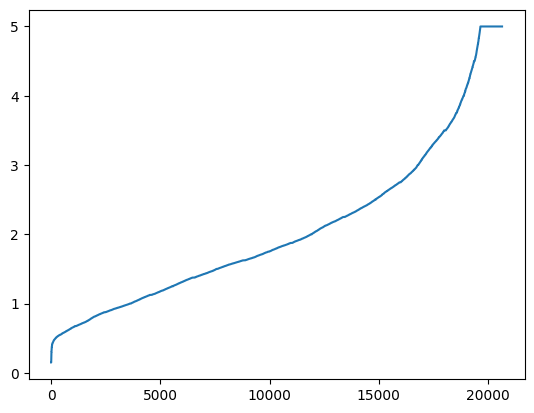

In [10]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.sort(y))
plt.show()

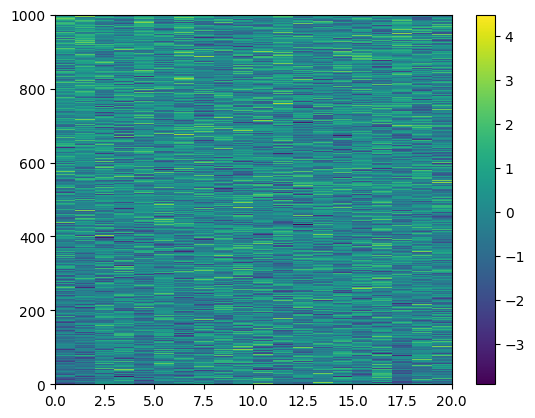

In [ ]:
ind_ = np.argsort(y)
plt.pcolormesh(X[ind_])
plt.colorbar()
plt.show()

In [ ]:
def mincua_reg(X,y,lamb_=1e-3): #Ajustar o optimizar
  alpha=np.linalg.inv(X.T.dot(X)+lamb_*np.eye(X.shape[1])).dot(X.T).dot(y)
  return alpha

[ 7.99999269e+01  9.86015897e+01  5.57286288e+00  2.41760761e-02
  8.64704289e+01 -3.94575875e-02  6.94411862e+01 -3.56275838e-03
  2.38619256e-02 -3.12145636e-02  1.86214575e+01  3.96564254e+01
  4.91812853e-03  3.10939044e+00 -4.42071056e-02  2.63860334e+01
 -2.41981026e-02  8.68971640e+01  3.51245931e-02  1.62243894e-02]


<StemContainer object of 3 artists>

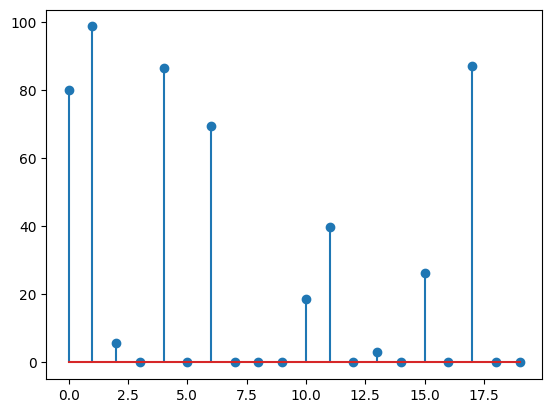

In [ ]:
alpha=mincua_reg(X,y)
print(alpha)
plt.stem(np.arange(len(alpha)),np.abs(alpha))

In [ ]:
ypred=X.dot(alpha)

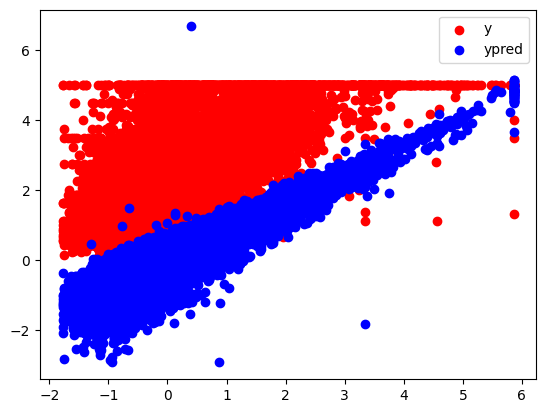

In [11]:
plt.scatter(X[ind_,0],y[ind_], c = 'r',marker='o', label='y')
plt.scatter(X[ind_,0],ypred[ind_],c='b', label='ypred')
plt.legend()
plt.show()

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


(20640, 8) (20640,)


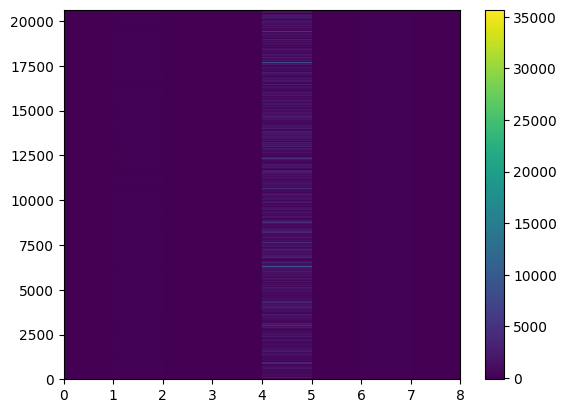

In [ ]:
x=housing.data
y=housing.target
print(x.shape,y.shape)
plt.pcolormesh(x)
plt.colorbar()
plt.show()

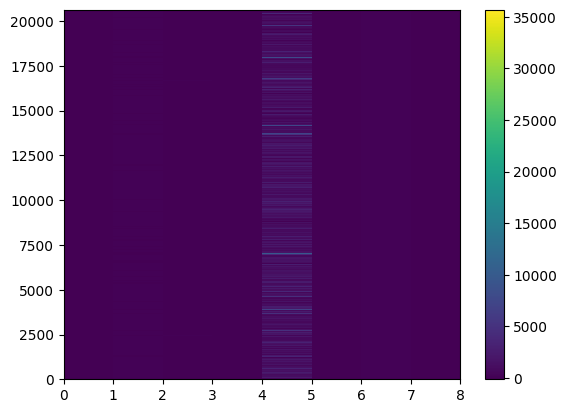

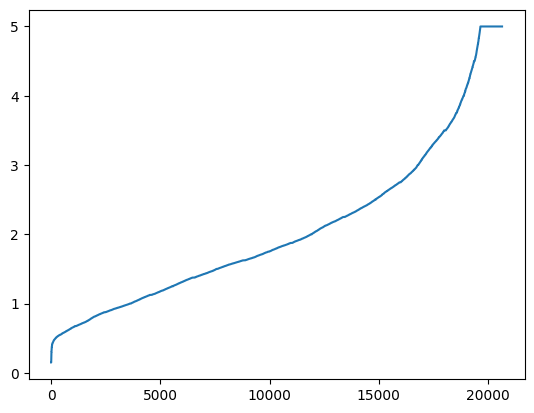

In [ ]:
ind_=np.argsort(y)
plt.pcolormesh(x[ind_])
plt.colorbar()
plt.show()
plt.plot(y[ind_])
plt.show()

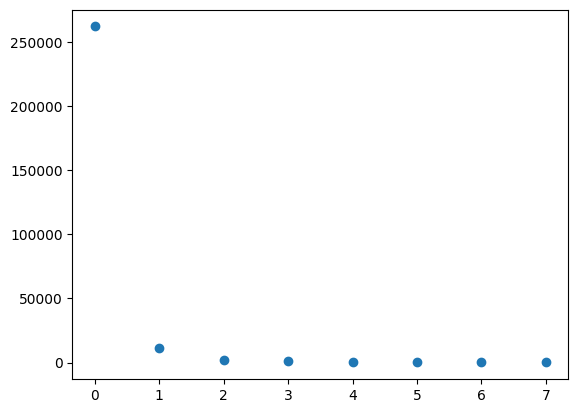

In [ ]:
U,S,Vh = np.linalg.svd(x)
plt.scatter(np.arange(len(S)),S)
plt.show()

[ 5.13515017e-01  1.56511122e-02 -1.82527999e-01  8.65097653e-01
  7.79231011e-06 -4.69928946e-03 -6.39458572e-02 -1.63827338e-02]


<StemContainer object of 3 artists>

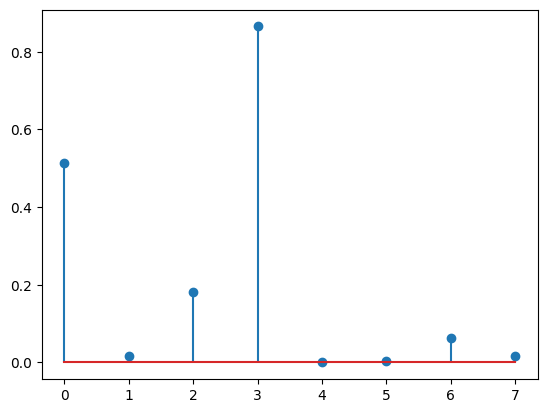

In [ ]:
alpha=mincua_reg(x,y)
print(alpha)
plt.stem(np.arange(len(alpha)),np.abs(alpha))

In [ ]:
ypred=x.dot(alpha)

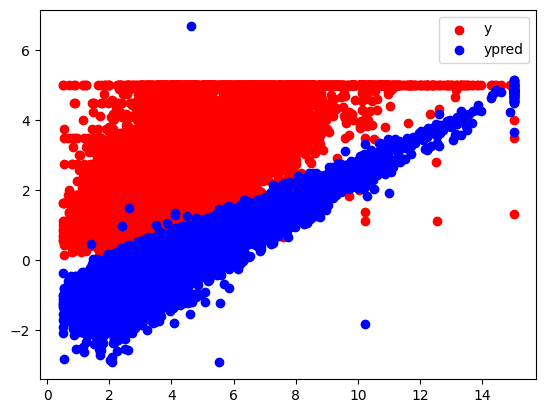

In [12]:
plt.scatter(x[ind_,0],y[ind_], c = 'r',marker='o', label='y')
plt.scatter(x[ind_,0],ypred[ind_],c='b', label='ypred')
plt.legend()
plt.show()

#Solución utilizando gradiente descendiente

#  Regresión Lineal con Regularización (Ridge)  
## Solución Analítica vs Gradiente Descendente

En este cuaderno resolvemos un problema de **regresión lineal regularizada** (tipo Ridge) utilizando dos enfoques:  
1. **Solución analítica (mínimos cuadrados con regularización).**  
2. **Optimización iterativa con gradiente descendente.**

---

## 1. Planteamiento del problema

Dado un conjunto de datos con:

- Matriz de características $$X \in \mathbb{R}^{N \times P}$$  
- Vector de etiquetas $$y \in \mathbb{R}^N$$  

queremos encontrar el vector de parámetros $$\alpha \in \mathbb{R}^P$$ que minimice la función de costo:

$$
J(\alpha) = \|y - X\alpha\|^2 + \lambda \|\alpha\|^2
$$

donde:  
- El primer término $\|y - X\alpha\|^2$ mide el error de predicción (residuales).  
- El segundo término $\lambda \|\alpha\|^2$ es la regularización Ridge, que penaliza coeficientes grandes para evitar sobreajuste.  

---

## 2. Solución analítica

Derivando la función de costo e igualando a cero, se obtiene:

$$
\alpha^* = (X^T X + \lambda I)^{-1} X^T y
$$

Esta es la solución en **forma cerrada**, que se obtiene directamente mediante álgebra matricial.  

---

## 3. Solución por Gradiente Descendente

En lugar de resolver directamente la ecuación anterior, podemos encontrar $\alpha$ de manera **iterativa**, aplicando gradiente descendente.  

### 3.1. Gradiente de la función de costo

El gradiente con respecto a $\alpha$ es:

$$
\nabla_\alpha J(\alpha) = -2X^T (y - X\alpha) + 2 \lambda \alpha
$$

---

### 3.2. Regla de actualización

Partiendo de una inicialización (por ejemplo, $\alpha^{(0)} = 0$), actualizamos en cada iteración:

$$
\alpha^{(t+1)} = \alpha^{(t)} - \eta \, \nabla_\alpha J(\alpha^{(t)})
$$

donde:  
- $\eta$ es la **tasa de aprendizaje** (learning rate).  
- $t$ es el número de iteraciones.  

Con el paso de las iteraciones, $\alpha^{(t)}$ se aproxima a la solución óptima.  

---

## 4. Implementación en el código

1. **Generación de datos sintéticos** con `make_regression`.  
2. **Cálculo analítico** de $\alpha$ usando la fórmula cerrada.  
3. **Implementación de gradiente descendente**:  
   - Se define la función de costo y su gradiente.  
   - Se inicializa $\alpha$ en cero.  
   - Se realizan múltiples iteraciones aplicando la regla de actualización.  
4. **Comparación de resultados**:  
   - Gráfica de la evolución del costo.  
   - Comparación de coeficientes obtenidos por ambos métodos.  
   - Predicciones de $y$ usando ambas soluciones.

---

## 5. Resultados esperados

- La **gráfica de costo** debe mostrar cómo este decrece hasta estabilizarse.  
- Los **coeficientes obtenidos por gradiente** deben aproximarse a los de la solución analítica.  
- Las **predicciones** de ambos métodos deben coincidir, mostrando que el gradiente descendente converge al mismo resultado que la solución cerrada.  

---


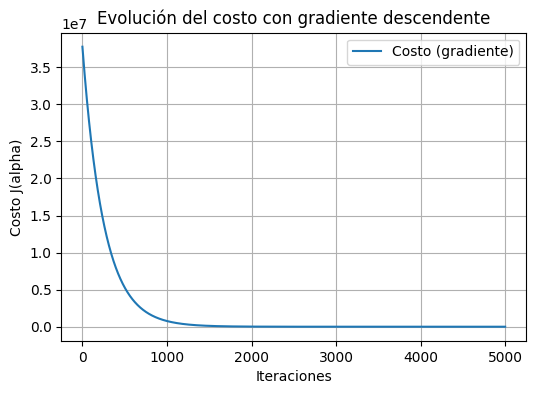

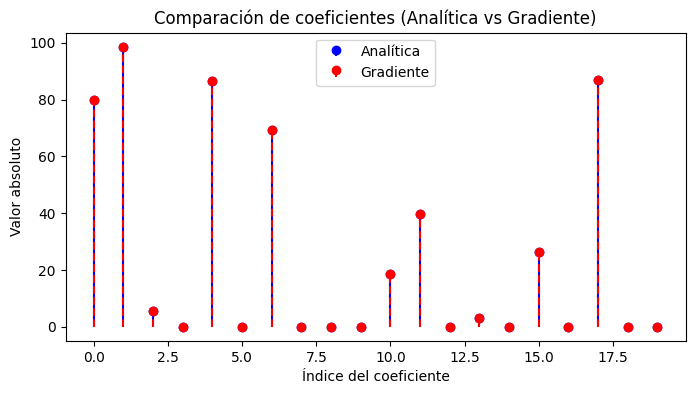

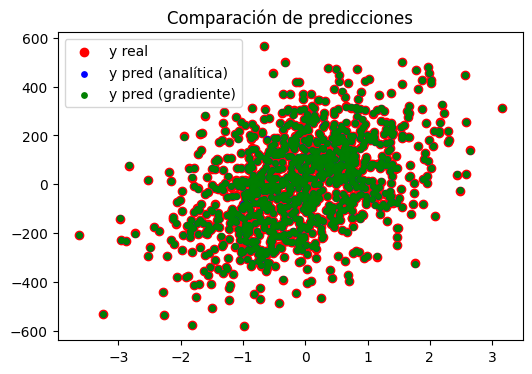

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression

# ================================
# Solución analítica (Ridge)
# ================================
def mincua_reg(X, y, lamb_=1e-3):
    alpha = np.linalg.inv(X.T.dot(X) + lamb_ * np.eye(X.shape[1])).dot(X.T).dot(y)
    return alpha

# ================================
# Funciones para gradiente descendente
# ================================
def compute_cost(X, y, alpha, lamb_=1e-3):
    """Costo cuadrático con regularización L2"""
    residuals = y - X.dot(alpha)
    return np.linalg.norm(residuals)**2 + lamb_ * np.linalg.norm(alpha)**2

def compute_gradient(X, y, alpha, lamb_=1e-3):
    """Gradiente de la función de costo"""
    return -2 * X.T.dot(y - X.dot(alpha)) + 2 * lamb_ * alpha

def gradient_descent(X, y, lr=1e-4, iters=2000, lamb_=1e-3):
    """Optimización por gradiente descendente"""
    alpha = np.zeros(X.shape[1])  # inicialización
    cost_hist = []

    for i in range(iters):
        grad = compute_gradient(X, y, alpha, lamb_)
        alpha -= lr * grad
        cost_hist.append(compute_cost(X, y, alpha, lamb_))

    return alpha, cost_hist

# ================================
# Datos de prueba
# ================================
N = 1000  # Samples
P = 20    # Features
X, y = make_regression(n_samples=N, n_features=P, noise=1, random_state=42)
ind_ = np.argsort(y)

# ================================
# Solución analítica
# ================================
alpha_closed = mincua_reg(X, y)
ypred_closed = X.dot(alpha_closed)

# ================================
# Solución por gradiente descendente
# ================================
alpha_gd, cost_hist = gradient_descent(X, y, lr=1e-6, iters=5000, lamb_=1e-3)
ypred_gd = X.dot(alpha_gd)

# ================================
# Graficar resultados
# ================================

# 1. Evolución del costo
plt.figure(figsize=(6,4))
plt.plot(cost_hist, label="Costo (gradiente)")
plt.xlabel("Iteraciones")
plt.ylabel("Costo J(alpha)")
plt.title("Evolución del costo con gradiente descendente")
plt.legend()
plt.grid()
plt.show()

# 2. Comparación de coeficientes
plt.figure(figsize=(8,4))
plt.stem(np.arange(len(alpha_closed)), np.abs(alpha_closed), linefmt="b-", markerfmt="bo", basefmt=" ", label="Analítica")
plt.stem(np.arange(len(alpha_gd)), np.abs(alpha_gd), linefmt="r--", markerfmt="ro", basefmt=" ", label="Gradiente")
plt.xlabel("Índice del coeficiente")
plt.ylabel("Valor absoluto")
plt.title("Comparación de coeficientes (Analítica vs Gradiente)")
plt.legend()
plt.show()

# 3. Predicciones
plt.figure(figsize=(6,4))
plt.scatter(X[ind_,0], y[ind_], c='r', marker='o', label='y real')
plt.scatter(X[ind_,0], ypred_closed[ind_], c='b', s=15, label='y pred (analítica)')
plt.scatter(X[ind_,0], ypred_gd[ind_], c='g', s=15, label='y pred (gradiente)')
plt.legend()
plt.title("Comparación de predicciones")
plt.show()


#  Explicación del método de Gradiente Descendente en Mínimos Cuadrados

## 1. Problema de mínimos cuadrados

Queremos resolver el problema de regresión lineal:

$$
\min_\alpha \; J(\alpha) = \|y - X\alpha\|_2^2 + \lambda \|\alpha\|_2^2
$$

donde:
- $X \in \mathbb{R}^{N \times P}$ es la matriz de datos,
- $y \in \mathbb{R}^N$ es el vector de salida,
- $\alpha \in \mathbb{R}^P$ son los coeficientes a optimizar,
- $\lambda$ es el parámetro de regularización Ridge (penaliza grandes valores de los coeficientes).

---

## 2. Derivación del Gradiente

El costo es:

$$
J(\alpha) = \frac{1}{N} \sum_{i=1}^N (y_i - x_i^T \alpha)^2 + \lambda \|\alpha\|_2^2
$$

Su gradiente respecto a $\alpha$ es:

$$
\nabla_\alpha J(\alpha) = \frac{2}{N} X^T (X\alpha - y) + 2 \lambda \alpha
$$

---

## 3. Regla de actualización por Gradiente Descendente

Dado un **learning rate** $\eta$, actualizamos:

$$
\alpha^{(t+1)} = \alpha^{(t)} - \eta \, \nabla_\alpha J(\alpha^{(t)})
$$

Esto se repite hasta convergencia.

---

## 4. Interpretación de las gráficas

- **Gráfica de costo**: muestra cómo disminuye el error cuadrático medio con las iteraciones, hasta acercarse al mínimo.
- **Coeficientes $\alpha$**: se observa la magnitud de cada parámetro aprendido. Algunos pueden tender a cero debido a la regularización.
- **Predicción vs Realidad**: comparamos los valores reales de la variable objetivo con las predicciones del modelo entrenado con gradiente descendente.

---

## 5. Conclusión

El gradiente descendente es un método **iterativo** que nos permite resolver el mismo problema que la solución analítica de mínimos cuadrados, pero con la ventaja de que puede aplicarse a:
- Grandes volúmenes de datos,
- Situaciones donde invertir matrices es costoso o numéricamente inestable,
- Casos en que se quiere optimizar de manera online (por lotes o en streaming).



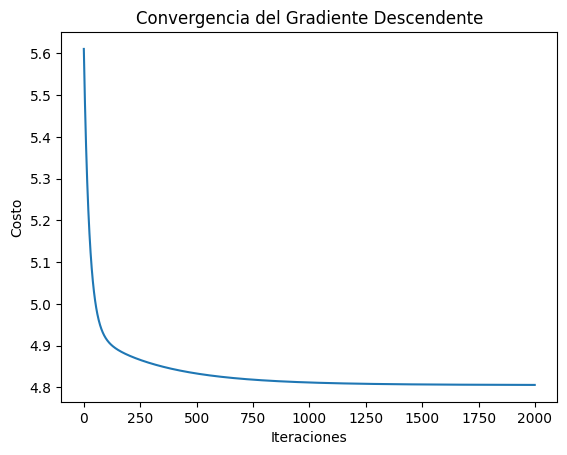

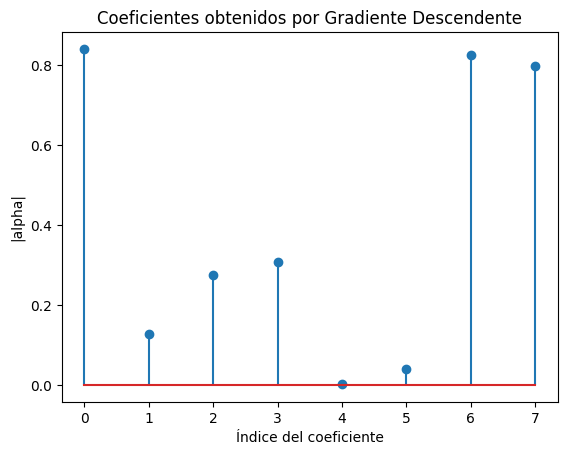

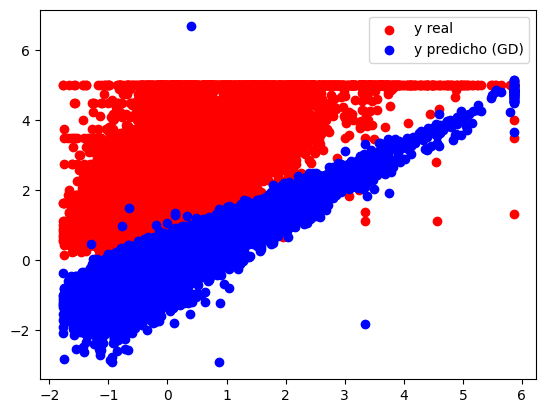

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# ===========================
# Solución por Gradiente Descendente
# ===========================
def gradient_descent(X, y, lr=1e-6, epochs=500, lamb_=1e-3):
    N, P = X.shape
    alpha = np.zeros(P)  # Inicialización en ceros
    cost_history = []

    for epoch in range(epochs):
        # Predicción
        y_pred = X.dot(alpha)

        # Error
        error = y_pred - y

        # Gradiente con regularización ridge (lambda)
        grad = (2/N) * X.T.dot(error) + 2*lamb_*alpha

        # Actualización
        alpha -= lr * grad

        # Costo (Error cuadrático medio con regularización)
        cost = (1/N) * np.sum(error**2) + lamb_*np.sum(alpha**2)
        cost_history.append(cost)

    return alpha, cost_history


# ===========================
# Cargar dataset
# ===========================
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Normalización para estabilizar gradiente
X = (X - X.mean(axis=0)) / X.std(axis=0)

# ===========================
# Entrenamiento por Gradiente Descendente
# ===========================
alpha_gd, cost_hist = gradient_descent(X, y, lr=1e-2, epochs=2000)

# ===========================
# Gráficas
# ===========================

# Convergencia del costo
plt.plot(cost_hist)
plt.xlabel("Iteraciones")
plt.ylabel("Costo")
plt.title("Convergencia del Gradiente Descendente")
plt.show()

# Visualización de coeficientes aprendidos
plt.stem(np.arange(len(alpha_gd)), np.abs(alpha_gd))
plt.xlabel("Índice del coeficiente")
plt.ylabel("|alpha|")
plt.title("Coeficientes obtenidos por Gradiente Descendente")
plt.show()

# Predicciones vs valores reales (solo con primera feature para visualizar)
ind_ = np.argsort(y)
ypred = X.dot(alpha_gd)
plt.scatter(X[ind_,0], y[ind_], c='r', marker='o', label='y real')
plt.scatter(X[ind_,0], ypred[ind_], c='b', label='y predicho (GD)')
plt.legend()
plt.show()
